In [1]:
import yaml
import matplotlib.pyplot as plt
%matplotlib inline

with open('../coverage-config.yaml') as f:
    config = yaml.load(f)
    
config

{'beast_jar': 'lib/feast.jar',
 'lsd_executable': 'lsd',
 'n_taxa': 10,
 'sampling_window': 20,
 'sequence_length': 1000,
 'relaxed_clock': False,
 'mutation_rate': 0.001,
 'kappa': 2.0,
 'frequencies': [0.24, 0.26, 0.26, 0.24],
 'rate_sd': None,
 'chain_length': 1000000,
 'log_every': 1000,
 'estimate_clock_rate': False,
 'prior_params': {'clock_rate': {'m': 1.0, 's': 1.25},
  'pop_size': {'m': 2, 's': 0.1},
  'kappa': {'m': 1.0, 's': 1.25}},
 'init_values': {'clock_rate': 1.0, 'pop_size': 10, 'kappa': 2.0},
 'estimate_topology': True,
 'n_iter': 30000,
 'inference': 'mean_field',
 'burn_in': 0.1,
 'n_runs': 100,
 'out_dir': 'out-coverage'}

In [70]:
import pathlib
import pandas as pd

out_dir = pathlib.Path('..') / config['out_dir']
result_df = pd.concat([pd.read_csv(out_dir / str(i) / 'results.csv') for i in range(45)])
result_df

,Unnamed: 0,method,quantile,value,variable,seed,truth
0,0,BEAST,0.025,0.981473,kappa,1,2.000000
1,1,BEAST,0.975,2.832098,kappa,1,2.000000
2,2,BEAST,0.025,6.032619,pop_size,1,8.692274
3,3,BEAST,0.975,8.765997,pop_size,1,8.692274
4,4,BEAST,0.025,20.776237,tree_height,1,24.555860
5,5,BEAST,0.975,28.153798,tree_height,1,24.555860
6,0,Variational,0.025,21.101471,tree_height,1,24.555860
7,1,Variational,0.975,28.909056,tree_height,1,24.555860
8,2,Variational,0.025,5.947571,pop_size,1,8.692274
9,3,Variational,0.975,8.940119,pop_size,1,8.692274


In [72]:
to_use = result_df[result_df.variable.isin(['pop_size', 'tree_height'])]
pivoted = (
    to_use
        .pivot_table('value', ['method', 'variable', 'seed', 'truth'], 'quantile')
        .reset_index()
        .rename(columns={ 0.025 : 'lower', 0.975: 'upper'})
    )
pivoted

quantile,method,variable,seed,truth,lower,upper
0,BEAST,pop_size,1,8.692274,6.032619,8.765997
1,BEAST,pop_size,2,7.087440,6.083190,8.746836
2,BEAST,pop_size,3,8.836252,6.249943,9.043982
3,BEAST,pop_size,4,7.426511,6.071557,8.973070
4,BEAST,pop_size,5,7.722381,6.202205,8.993241
5,BEAST,pop_size,6,7.162232,6.248312,8.990365
6,BEAST,pop_size,7,8.749990,6.011116,8.821055
7,BEAST,pop_size,8,7.456756,6.077441,8.819649
8,BEAST,pop_size,9,7.389875,6.061754,8.790011
9,BEAST,pop_size,10,8.441488,6.197980,8.867519


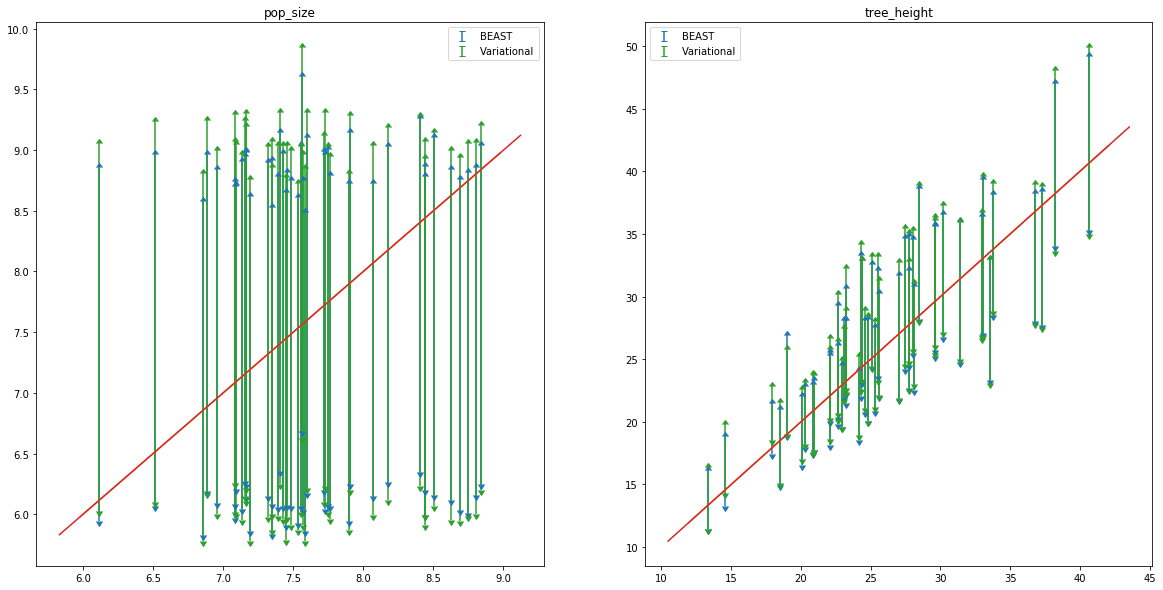

In [73]:
fig, axs = plt.subplots(ncols=len(pivoted.variable.unique()), figsize=(20, 10))
grouped_variable = pivoted.groupby('variable')
for ax, (variable, var_df) in zip(axs, grouped_variable):
    ax.set_title(variable)
    for method, method_df in var_df.groupby('method'):
        y = (method_df.lower + method_df.upper)/2
        ax.errorbar(method_df.truth,
                    y,
                    (y - method_df.lower, method_df.upper - y),
                    label=method,
                    fmt='none',
                    uplims=True,
                    lolims=True)
        ax.plot(ax.get_xlim(), ax.get_xlim())
    ax.legend()

In [74]:
with_covered = pivoted.assign(covered = (pivoted.truth >= pivoted.lower) & (pivoted.truth <= pivoted.upper))
with_covered.groupby(['method', 'variable']).covered.mean()

method       variable   
BEAST        pop_size       1.000000
             tree_height    0.955556
Variational  pop_size       1.000000
             tree_height    0.933333
Name: covered, dtype: float64